In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
# Full path to the file
file_path = r"C:\Users\Kaleb\OneDrive\Desktop\insurance-risk-modeling\acis-insurance-risk-modeling\data\cleaned_insurance_data.csv"




In [3]:
df = pd.read_csv(file_path, sep=',', parse_dates=['TransactionMonth'], low_memory=False)



In [4]:
df['HasClaim'] = df['TotalClaims'] > 0
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

In [8]:

# Example: Province level comparison for Claim Frequency
province_freq = df.groupby('Province')['HasClaim'].mean()
province_sev = df[df['HasClaim']].groupby('Province')['TotalClaims'].mean()
province_margin = df.groupby('Province')['Margin'].mean()


In [9]:
# Chi-squared for claim frequency
province_contingency = pd.crosstab(df['Province'], df['HasClaim'])
chi2, p_prov_freq, _, _ = chi2_contingency(province_contingency)

# T-test for claim severity (only where claims occurred)
claims = df[df['HasClaim']]
grouped_provinces = [g['TotalClaims'].values for name, g in claims.groupby('Province')]
# Note: For more than 2 groups, ANOVA is preferred:
from scipy.stats import f_oneway
f_stat, p_prov_sev = f_oneway(*grouped_provinces)


In [10]:
grouped_margin = [g['Margin'].values for name, g in df.groupby('PostalCode')]
f_stat, p_zip_margin = f_oneway(*grouped_margin)


In [11]:
# Claim Frequency
gender_freq = pd.crosstab(df['Gender'], df['HasClaim'])
chi2, p_gender_freq, _, _ = chi2_contingency(gender_freq)

# Severity
female_claims = df[(df['Gender'] == 'Female') & (df['HasClaim'])]['TotalClaims']
male_claims = df[(df['Gender'] == 'Male') & (df['HasClaim'])]['TotalClaims']
t_stat, p_gender_sev = ttest_ind(female_claims, male_claims, equal_var=False)


In [12]:
print("Province Claim Frequency p-value:", p_prov_freq)
print("Province Claim Severity p-value:", p_prov_sev)


Province Claim Frequency p-value: 8.757242379337716e-15
Province Claim Severity p-value: 2.7567471486104653e-10


In [13]:
print("Zip Code Margin Difference p-value:", p_zip_margin)


Zip Code Margin Difference p-value: 0.0


In [14]:
print("Gender Claim Frequency p-value:", p_gender_freq)
print("Gender Claim Severity p-value:", p_gender_sev)


Gender Claim Frequency p-value: 0.5912034231195855
Gender Claim Severity p-value: 0.31454631144569783


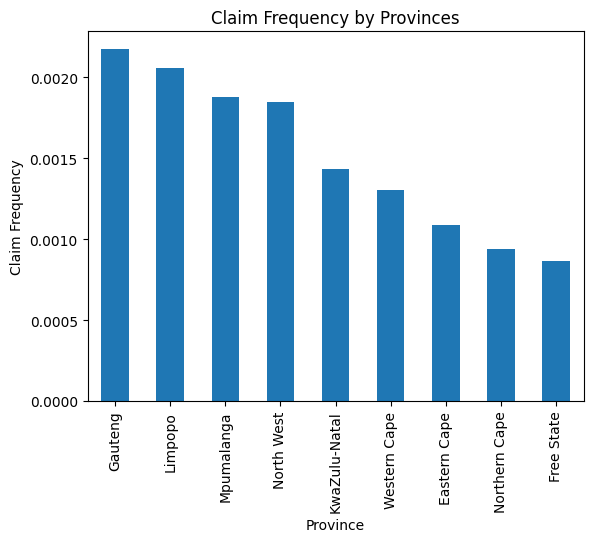

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

province_claim_freq = df.groupby('Province')['HasClaim'].mean().sort_values(ascending=False)
province_claim_freq.plot(kind='bar', title='Claim Frequency by Provinces')
plt.ylabel('Claim Frequency')
plt.show()


